In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [2]:
data.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [3]:
target.head()

0        donated
1        donated
2        donated
3        donated
4    not donated
Name: Class, dtype: object

In [7]:
target.value_counts(dropna=False, normalize=True)

not donated    0.762032
donated        0.237968
Name: Class, dtype: float64

In [5]:
data.isna().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
dtype: int64

In [2]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('num', num_transformer, data.columns.to_list()),
])
bm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent')),
])
score = cross_val_score(bm, data, target, cv=10,
                        n_jobs=-1,
                       scoring='balanced_accuracy',)

In [15]:
score.mean(), score.std()

(0.5, 0.0)

In [3]:
from sklearn.neighbors import KNeighborsClassifier


model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier()),
])
score = cross_val_score(model, data, target, cv=10,
                        n_jobs=-1,
                        scoring='balanced_accuracy',
                       )


In [19]:
score.mean().round(3), score.std().round(3)

(0.561, 0.079)

In [4]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    model, data, target, cv=10, scoring="balanced_accuracy", return_train_score=True
)
cv_results = pd.DataFrame(cv_results)
cv_results[["train_score", "test_score"]].mean()

train_score    0.693856
test_score     0.560707
dtype: float64

In [8]:
for p in model.get_params():
    print(p)

algorithm
leaf_size
metric
metric_params
n_jobs
n_neighbors
p
weights


In [5]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [25]:
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
model = KNeighborsClassifier()
train_scores, test_scores = validation_curve(
    model, 
    data, 
    target, 
    param_name="n_neighbors", 
    param_range=param_range,
    cv=5, 
    scoring="balanced_accuracy", 
    n_jobs=-1
)

train_errors, test_errors = train_scores, test_scores

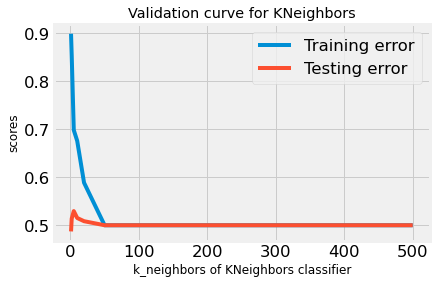

In [26]:
plt.plot(param_range, train_errors.mean(axis=1), label="Training error")
plt.plot(param_range, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("k_neighbors of KNeighbors classifier")
plt.ylabel("scores")
_ = plt.title("Validation curve for KNeighbors")

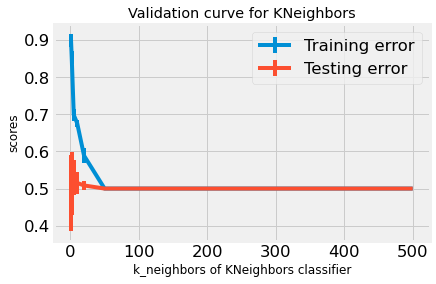

In [27]:
plt.errorbar(param_range, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label='Training error')
plt.errorbar(param_range, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label='Testing error')
plt.legend()

plt.xlabel("k_neighbors of KNeighbors classifier")
plt.ylabel("scores")
_ = plt.title("Validation curve for KNeighbors")